# 🚀 PostgreSQL vs MongoDB - Analiza Wydajności

## Cel projektu
Porównanie wydajności operacji CRUD między PostgreSQL (baza relacyjna) a MongoDB (baza dokumentowa) na danych tweetów o Bitcoin.

## Rozmiary danych testowych
- **10,000 rekordów** - mały zbiór testowy
- **100,000 rekordów** - średni zbiór testowy  
- **1,000,000 rekordów** - duży zbiór testowy

## Plan eksperymentu
1. Przygotowanie środowiska i danych
2. Populacja baz danych dla każdego rozmiaru
3. Testy operacji CRUD (Create, Read, Update, Delete)
4. Wizualizacja wyników
5. Analiza i wnioski


## 1. 📦 Instalacja i importy

### 1.1. Instalacja pakietów


In [ ]:
# Instalacja wymaganych pakietów (uruchom raz, jeśli potrzebne)
# !pip install -q psycopg2-binary pymongo pandas python-dotenv matplotlib seaborn jupyterlab


### 1.2. Importy bibliotek standardowych


In [1]:
# Importy bibliotek standardowych
import sys
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Any
from pymongo import InsertOne

print("✅ Biblioteki standardowe załadowane!")


✅ Biblioteki standardowe załadowane!


### 1.3. Importy z projektu


In [2]:
# Dodaj src do ścieżki
sys.path.append('src')

# Importy z projektu
from src.config import *
from src.db.postgres_manager import PostgresManager
from src.db.mongo_manager import MongoManager
from src.db.data_precleaner import DataPrecleaner

print("✅ Importy z projektu załadowane!")


✅ Importy z projektu załadowane!


### 1.4. Konfiguracja wykresów


In [3]:
# Konfiguracja wykresów
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Konfiguracja wykresów ustawiona!")


✅ Konfiguracja wykresów ustawiona!


### 1.5. Sprawdzenie konfiguracji


In [4]:
# Sprawdzenie zmiennych środowiskowych systemowych
print("🔍 Zmienne środowiskowe systemowe:")
print(f"  PG_HOST (env): {os.getenv('PG_HOST', 'NIE USTAWIONA')}")
print(f"  POSTGRES_DB (env): {os.getenv('POSTGRES_DB', 'NIE USTAWIONA')}")
print(f"  MONGO_URI (env): {os.getenv('MONGO_URI', 'NIE USTAWIONA')}")

print("\n📋 Aktualna konfiguracja (z config.py):")
print(f"  PostgreSQL Host: {PG_HOST}")
print(f"  PostgreSQL Port: {PG_PORT}")
print(f"  PostgreSQL DB: {PG_DB}")
print(f"  MongoDB URI: {MONGO_URI}")
print(f"  MongoDB DB: {MONGO_DB}")
print(f"  CSV Path: {CSV_PATH}")

print("\n💡 Uwaga:")
print("  - W Dockerze: powinno być 'postgres' i 'mongodb://mongo:27017'")
print("  - Lokalnie: używa 'localhost'")
print("  - Jeśli widzisz 'localhost' w Dockerze, zrestartuj kontener:")
print("    docker compose restart jupyter")
print("  - Lub przebuduj kontener:")
print("    docker compose up -d --build jupyter")


🔍 Zmienne środowiskowe systemowe:
  PG_HOST (env): postgres
  POSTGRES_DB (env): social
  MONGO_URI (env): mongodb://mongo:27017

📋 Aktualna konfiguracja (z config.py):
  PostgreSQL Host: postgres
  PostgreSQL Port: 5432
  PostgreSQL DB: social
  MongoDB URI: mongodb://mongo:27017
  MongoDB DB: social
  CSV Path: data/Bitcoin_tweets.csv

💡 Uwaga:
  - W Dockerze: powinno być 'postgres' i 'mongodb://mongo:27017'
  - Lokalnie: używa 'localhost'
  - Jeśli widzisz 'localhost' w Dockerze, zrestartuj kontener:
    docker compose restart jupyter
  - Lub przebuduj kontener:
    docker compose up -d --build jupyter


## 2. 🔧 Inicjalizacja klas

### 2.1. Inicjalizacja DataPrecleaner


In [6]:
# Inicjalizacja DataPrecleaner
cleaner = DataPrecleaner()
print("✅ DataPrecleaner zainicjalizowany!")


✅ DataPrecleaner zainicjalizowany!


### 2.2. Połączenie z PostgreSQL


In [7]:
# Połączenie z PostgreSQL
pg = PostgresManager(PG_HOST, PG_PORT, PG_DB, PG_USER, PG_PASS)
print("✅ Połączono z PostgreSQL!")


✅ Połączono z PostgreSQL!


### 2.3. Połączenie z MongoDB


In [8]:
# Połączenie z MongoDB
mg = MongoManager(MONGO_URI, MONGO_DB)
print("✅ Połączono z MongoDB!")


✅ Połączono z MongoDB!


## 3. 📊 Opis struktury danych

### PostgreSQL (Model relacyjny)
- **users** - informacje o użytkownikach (user_name, user_location, user_description, user_created, user_followers, user_friends, user_favourites, user_verified)
- **tweets** - tweety z referencjami do użytkowników (date, text, source_id, is_retweet)
- **hashtags** - hashtagi (tag)
- **sources** - źródła tweetów (name)
- **tweet_hashtags** - relacja many-to-many między tweetami a hashtagami

### MongoDB (Model dokumentowy)
- **tweets** - pojedyncza kolekcja z zagnieżdżonymi dokumentami:
  - `user` (zagnieżdżony obiekt z danymi użytkownika)
  - `date`, `text`, `hashtags` (tablica), `source`, `is_retweet`


## 4. 📋 Modele danych


In [8]:
# Wszystkie funkcje pomocnicze są teraz w klasach PostgresManager i MongoManager
# Używamy metod z klas zamiast funkcji pomocniczych
print("✅ Gotowe do użycia metod z klas!")


✅ Gotowe do użycia metod z klas!


## 5. 📥 Przygotowanie danych


📁 Wczytywanie danych z: data/Bitcoin_tweets.csv


## 6. 🧪 Eksperymenty

Każdy eksperyment:
1. Wczytuje odpowiedni plik CSV (10k, 100k, 1M)
2. Czyści dane za pomocą `DataPrecleaner`
3. Czyści bazy danych
4. Populuje bazy danych
5. Wykonuje testy CRUD

Wszystkie funkcje testowe CRUD są dostępne jako metody w klasach:
- `PostgresManager.test_read_count()`, `test_read_recent()`, `test_read_hashtag()`, `test_create()`, `test_update()`, `test_delete()`
- `MongoManager.test_read_count()`, `test_read_recent()`, `test_read_hashtag()`, `test_create()`, `test_update()`, `test_delete()`


## 7. 🧪 Eksperymenty

### 7.1. Eksperyment z 10,000 rekordami

#### 7.1.1. Wczytanie i przygotowanie danych


In [9]:
# Wczytanie i przygotowanie danych
print("="*60)
print("EKSPERYMENT: 10,000 rekordów")
print("="*60)

# Wczytaj dane z pliku
csv_path_10k = "data/Bitcoin_tweets_10k.csv"
print(f"📁 Wczytywanie danych z: {csv_path_10k}")
df_raw_10k = pd.read_csv(csv_path_10k)
print(f"📊 Załadowano {len(df_raw_10k):,} rekordów")

# Analiza danych
analysis_10k = cleaner.analyze_data(df_raw_10k)

# Czyszczenie danych
df_10k, clean_time_10k = cleaner.clean_data_timed(df_raw_10k)

print(f"\n📈 Podsumowanie:")
print(f"  Przed czyszczeniem: {analysis_10k['total_records']:,} rekordów")
print(f"  Po czyszczeniu: {len(df_10k):,} rekordów")
print(f"  Czas czyszczenia: {clean_time_10k:.4f}s")


EKSPERYMENT: 10,000 rekordów
📁 Wczytywanie danych z: data/Bitcoin_tweets_10k.csv
📊 Załadowano 10,000 rekordów
📊 Analiza danych CSV...
  📈 Rekordów: 10,000
  📈 Kolumn: 13
🧹 Czyszczenie danych CSV...
✅ Dane wyczyszczone w 0.0847s

📈 Podsumowanie:
  Przed czyszczeniem: 10,000 rekordów
  Po czyszczeniu: 10,000 rekordów
  Czas czyszczenia: 0.0847s


#### 7.1.2. Czyszczenie baz danych


In [10]:
# Czyszczenie baz danych
pg.clear_database()
mg.clear_database()


🧹 Czyszczenie bazy PostgreSQL...
✅ PostgreSQL wyczyszczone w 0.0144s
🧹 Czyszczenie bazy MongoDB...
✅ MongoDB wyczyszczone w 0.0016s


0.0016281250000247383

#### 7.1.3. Populacja baz danych


In [11]:
# Ładowanie danych do PostgreSQL
pg_load_time = pg.load_data_from_dataframe(df_10k, batch_size=1000)

# Ładowanie danych do MongoDB
mongo_load_time = mg.load_data_from_dataframe(df_10k, batch_size=1000)

# Zapisz wyniki
results_10k = {
    "load": {"postgresql": pg_load_time, "mongodb": mongo_load_time},
    "crud": {}
}

print(f"\n✅ Populacja zakończona!")
print(f"  PostgreSQL: {pg_load_time:.4f}s")
print(f"  MongoDB: {mongo_load_time:.4f}s")


📥 Ładowanie 10,000 rekordów do PostgreSQL...
✅ Załadowano 10,000 rekordów do PostgreSQL w 6.1111s
📥 Ładowanie 10,000 rekordów do MongoDB...
✅ Załadowano 10,000 rekordów do MongoDB w 0.2698s

✅ Populacja zakończona!
  PostgreSQL: 6.1111s
  MongoDB: 0.2698s


#### 7.1.4. Testy CRUD


In [12]:
# Testy CRUD
print("\n🧪 Uruchamianie testów CRUD...")

# READ tests
pg_read_count = pg.test_read_count()
mongo_read_count = mg.test_read_count()
results_10k["crud"]["read_count"] = {
    "postgresql": pg_read_count["time"],
    "mongodb": mongo_read_count["time"]
}

pg_read_recent = pg.test_read_recent(limit=100)
mongo_read_recent = mg.test_read_recent(limit=100)
results_10k["crud"]["read_recent"] = {
    "postgresql": pg_read_recent["time"],
    "mongodb": mongo_read_recent["time"]
}

pg_read_hashtag = pg.test_read_hashtag(hashtag="bitcoin", limit=50)
mongo_read_hashtag = mg.test_read_hashtag(hashtag="bitcoin", limit=50)
results_10k["crud"]["read_hashtag"] = {
    "postgresql": pg_read_hashtag["time"],
    "mongodb": mongo_read_hashtag["time"]
}

# CREATE test
sample_row = df_10k.iloc[0].to_dict()
pg_create = pg.test_create(sample_row)
mongo_create = mg.test_create(sample_row)
results_10k["crud"]["create"] = {
    "postgresql": pg_create["time"],
    "mongodb": mongo_create["time"]
}

# UPDATE test
pg_update = pg.test_update()
mongo_update = mg.test_update()
results_10k["crud"]["update"] = {
    "postgresql": pg_update["time"],
    "mongodb": mongo_update["time"]
}

# DELETE test
pg_delete = pg.test_delete()
mongo_delete = mg.test_delete()
results_10k["crud"]["delete"] = {
    "postgresql": pg_delete["time"],
    "mongodb": mongo_delete["time"]
}

print("\n✅ Testy CRUD zakończone!")
print("\n📊 Wyniki testów:")
for test_name, result in results_10k["crud"].items():
    print(f"  {test_name}:")
    print(f"    PostgreSQL: {result['postgresql']:.6f}s")
    print(f"    MongoDB: {result['mongodb']:.6f}s")
    print(f"    Różnica: {result['postgresql']/result['mongodb']:.2f}x")



🧪 Uruchamianie testów CRUD...

✅ Testy CRUD zakończone!

📊 Wyniki testów:
  read_count:
    PostgreSQL: 0.008258s
    MongoDB: 0.011067s
    Różnica: 0.75x
  read_recent:
    PostgreSQL: 0.003550s
    MongoDB: 0.001552s
    Różnica: 2.29x
  read_hashtag:
    PostgreSQL: 0.010341s
    MongoDB: 0.003672s
    Różnica: 2.82x
  create:
    PostgreSQL: 0.001246s
    MongoDB: 0.000406s
    Różnica: 3.07x
  update:
    PostgreSQL: 0.000498s
    MongoDB: 0.001151s
    Różnica: 0.43x
  delete:
    PostgreSQL: 0.000375s
    MongoDB: 0.000683s
    Różnica: 0.55x


### 7.2. Eksperyment z 100,000 rekordami

#### 7.2.1. Wczytanie i przygotowanie danych


In [13]:
# Wczytanie i przygotowanie danych
print("="*60)
print("EKSPERYMENT: 100,000 rekordów")
print("="*60)

# Wczytaj dane z pliku
csv_path_100k = "data/Bitcoin_tweets_100k.csv"
print(f"📁 Wczytywanie danych z: {csv_path_100k}")
df_raw_100k = pd.read_csv(csv_path_100k)
print(f"📊 Załadowano {len(df_raw_100k):,} rekordów")

# Analiza danych
analysis_100k = cleaner.analyze_data(df_raw_100k)

# Czyszczenie danych
df_100k, clean_time_100k = cleaner.clean_data_timed(df_raw_100k)

print(f"\n📈 Podsumowanie:")
print(f"  Przed czyszczeniem: {analysis_100k['total_records']:,} rekordów")
print(f"  Po czyszczeniu: {len(df_100k):,} rekordów")
print(f"  Czas czyszczenia: {clean_time_100k:.4f}s")


EKSPERYMENT: 100,000 rekordów
📁 Wczytywanie danych z: data/Bitcoin_tweets_100k.csv


/tmp/ipykernel_27/1861413517.py:9: DtypeWarning: Columns (5,6,7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw_100k = pd.read_csv(csv_path_100k)
/workspace/src/db/data_precleaner.py:102: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["date"] = df["date"].fillna(method='ffill')


📊 Załadowano 100,000 rekordów
📊 Analiza danych CSV...
  📈 Rekordów: 100,000
  📈 Kolumn: 13
🧹 Czyszczenie danych CSV...
✅ Dane wyczyszczone w 0.7212s

📈 Podsumowanie:
  Przed czyszczeniem: 100,000 rekordów
  Po czyszczeniu: 100,000 rekordów
  Czas czyszczenia: 0.7212s


#### 7.2.2. Czyszczenie baz danych


In [14]:
# Czyszczenie baz danych
pg.clear_database()
mg.clear_database()


🧹 Czyszczenie bazy PostgreSQL...
✅ PostgreSQL wyczyszczone w 0.0106s
🧹 Czyszczenie bazy MongoDB...
✅ MongoDB wyczyszczone w 0.0020s


0.0020085420001123566

#### 7.2.3. Populacja baz danych


In [15]:
# Ładowanie danych do PostgreSQL
pg_load_time = pg.load_data_from_dataframe(df_100k, batch_size=1000)

# Ładowanie danych do MongoDB
mongo_load_time = mg.load_data_from_dataframe(df_100k, batch_size=1000)

# Zapisz wyniki
results_100k = {
    "load": {"postgresql": pg_load_time, "mongodb": mongo_load_time},
    "crud": {}
}

print(f"\n✅ Populacja zakończona!")
print(f"  PostgreSQL: {pg_load_time:.4f}s")
print(f"  MongoDB: {mongo_load_time:.4f}s")


📥 Ładowanie 100,000 rekordów do PostgreSQL...
✅ Załadowano 100,000 rekordów do PostgreSQL w 75.4353s
📥 Ładowanie 100,000 rekordów do MongoDB...
✅ Załadowano 100,000 rekordów do MongoDB w 2.7447s

✅ Populacja zakończona!
  PostgreSQL: 75.4353s
  MongoDB: 2.7447s


#### 7.2.4. Testy CRUD


In [16]:
# Testy CRUD
print("\n🧪 Uruchamianie testów CRUD...")

# READ tests
pg_read_count = pg.test_read_count()
mongo_read_count = mg.test_read_count()
results_100k["crud"]["read_count"] = {
    "postgresql": pg_read_count["time"],
    "mongodb": mongo_read_count["time"]
}

pg_read_recent = pg.test_read_recent(limit=100)
mongo_read_recent = mg.test_read_recent(limit=100)
results_100k["crud"]["read_recent"] = {
    "postgresql": pg_read_recent["time"],
    "mongodb": mongo_read_recent["time"]
}

pg_read_hashtag = pg.test_read_hashtag(hashtag="bitcoin", limit=50)
mongo_read_hashtag = mg.test_read_hashtag(hashtag="bitcoin", limit=50)
results_100k["crud"]["read_hashtag"] = {
    "postgresql": pg_read_hashtag["time"],
    "mongodb": mongo_read_hashtag["time"]
}

# CREATE test
sample_row = df_100k.iloc[0].to_dict()
pg_create = pg.test_create(sample_row)
mongo_create = mg.test_create(sample_row)
results_100k["crud"]["create"] = {
    "postgresql": pg_create["time"],
    "mongodb": mongo_create["time"]
}

# UPDATE test
pg_update = pg.test_update()
mongo_update = mg.test_update()
results_100k["crud"]["update"] = {
    "postgresql": pg_update["time"],
    "mongodb": mongo_update["time"]
}

# DELETE test
pg_delete = pg.test_delete()
mongo_delete = mg.test_delete()
results_100k["crud"]["delete"] = {
    "postgresql": pg_delete["time"],
    "mongodb": mongo_delete["time"]
}

print("\n✅ Testy CRUD zakończone!")
print("\n📊 Wyniki testów:")
for test_name, result in results_100k["crud"].items():
    print(f"  {test_name}:")
    print(f"    PostgreSQL: {result['postgresql']:.6f}s")
    print(f"    MongoDB: {result['mongodb']:.6f}s")
    print(f"    Różnica: {result['postgresql']/result['mongodb']:.2f}x")



🧪 Uruchamianie testów CRUD...

✅ Testy CRUD zakończone!

📊 Wyniki testów:
  read_count:
    PostgreSQL: 0.009930s
    MongoDB: 0.032886s
    Różnica: 0.30x
  read_recent:
    PostgreSQL: 0.029778s
    MongoDB: 0.001056s
    Różnica: 28.20x
  read_hashtag:
    PostgreSQL: 0.062469s
    MongoDB: 0.001041s
    Różnica: 59.99x
  create:
    PostgreSQL: 0.001584s
    MongoDB: 0.000312s
    Różnica: 5.08x
  update:
    PostgreSQL: 0.001023s
    MongoDB: 0.002338s
    Różnica: 0.44x
  delete:
    PostgreSQL: 0.000322s
    MongoDB: 0.000267s
    Różnica: 1.20x


### 7.3. Eksperyment z 1,000,000 rekordami

#### 7.3.1. Wczytanie i przygotowanie danych


In [18]:
# Wczytanie i przygotowanie danych
print("="*60)
print("EKSPERYMENT: 1,000,000 rekordów")
print("="*60)

# Wczytaj dane z pliku
csv_path_1m = "data/Bitcoin_tweets_1M.csv"
print(f"📁 Wczytywanie danych z: {csv_path_1m}")
df_raw_1m = pd.read_csv(csv_path_1m)
print(f"📊 Załadowano {len(df_raw_1m):,} rekordów")

# Analiza danych
analysis_1m = cleaner.analyze_data(df_raw_1m)

# Czyszczenie danych
df_1m, clean_time_1m = cleaner.clean_data_timed(df_raw_1m)

print(f"\n📈 Podsumowanie:")
print(f"  Przed czyszczeniem: {analysis_1m['total_records']:,} rekordów")
print(f"  Po czyszczeniu: {len(df_1m):,} rekordów")
print(f"  Czas czyszczenia: {clean_time_1m:.4f}s")


EKSPERYMENT: 1,000,000 rekordów
📁 Wczytywanie danych z: data/Bitcoin_tweets_1M.csv


/tmp/ipykernel_27/1060325944.py:9: DtypeWarning: Columns (5,6,7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw_1m = pd.read_csv(csv_path_1m)


📊 Załadowano 1,000,000 rekordów
📊 Analiza danych CSV...
  📈 Rekordów: 1,000,000
  📈 Kolumn: 13
🧹 Czyszczenie danych CSV...


/workspace/src/db/data_precleaner.py:102: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["date"] = df["date"].fillna(method='ffill')


✅ Dane wyczyszczone w 8.6434s

📈 Podsumowanie:
  Przed czyszczeniem: 1,000,000 rekordów
  Po czyszczeniu: 1,000,000 rekordów
  Czas czyszczenia: 8.6434s


#### 7.3.2. Czyszczenie baz danych


In [19]:
# Czyszczenie baz danych
pg.clear_database()
mg.clear_database()


🧹 Czyszczenie bazy PostgreSQL...
✅ PostgreSQL wyczyszczone w 0.0216s
🧹 Czyszczenie bazy MongoDB...
✅ MongoDB wyczyszczone w 0.0014s


0.0014124169997558056

In [20]:
# Ładowanie danych do PostgreSQL
pg_load_time = pg.load_data_from_dataframe(df_1m, batch_size=1000)

# Ładowanie danych do MongoDB
mongo_load_time = mg.load_data_from_dataframe(df_1m, batch_size=1000)

# Zapisz wyniki
results_1m = {
    "load": {"postgresql": pg_load_time, "mongodb": mongo_load_time},
    "crud": {}
}

print(f"\n✅ Populacja zakończona!")
print(f"  PostgreSQL: {pg_load_time:.4f}s")
print(f"  MongoDB: {mongo_load_time:.4f}s")


📥 Ładowanie 1,000,000 rekordów do PostgreSQL...
✅ Załadowano 1,000,000 rekordów do PostgreSQL w 956.6662s
📥 Ładowanie 1,000,000 rekordów do MongoDB...
✅ Załadowano 1,000,000 rekordów do MongoDB w 29.6720s

✅ Populacja zakończona!
  PostgreSQL: 956.6662s
  MongoDB: 29.6720s


#### 7.3.3. Testy CRUD


In [21]:
# Testy CRUD
print("\n🧪 Uruchamianie testów CRUD...")

# READ tests
pg_read_count = pg.test_read_count()
mongo_read_count = mg.test_read_count()
results_1m["crud"]["read_count"] = {
    "postgresql": pg_read_count["time"],
    "mongodb": mongo_read_count["time"]
}

pg_read_recent = pg.test_read_recent(limit=100)
mongo_read_recent = mg.test_read_recent(limit=100)
results_1m["crud"]["read_recent"] = {
    "postgresql": pg_read_recent["time"],
    "mongodb": mongo_read_recent["time"]
}

pg_read_hashtag = pg.test_read_hashtag(hashtag="bitcoin", limit=50)
mongo_read_hashtag = mg.test_read_hashtag(hashtag="bitcoin", limit=50)
results_1m["crud"]["read_hashtag"] = {
    "postgresql": pg_read_hashtag["time"],
    "mongodb": mongo_read_hashtag["time"]
}

# CREATE test
sample_row = df_1m.iloc[0].to_dict()
pg_create = pg.test_create(sample_row)
mongo_create = mg.test_create(sample_row)
results_1m["crud"]["create"] = {
    "postgresql": pg_create["time"],
    "mongodb": mongo_create["time"]
}

# UPDATE test
pg_update = pg.test_update()
mongo_update = mg.test_update()
results_1m["crud"]["update"] = {
    "postgresql": pg_update["time"],
    "mongodb": mongo_update["time"]
}

# DELETE test
pg_delete = pg.test_delete()
mongo_delete = mg.test_delete()
results_1m["crud"]["delete"] = {
    "postgresql": pg_delete["time"],
    "mongodb": mongo_delete["time"]
}

print("\n✅ Testy CRUD zakończone!")
print("\n📊 Wyniki testów:")
for test_name, result in results_1m["crud"].items():
    print(f"  {test_name}:")
    print(f"    PostgreSQL: {result['postgresql']:.6f}s")
    print(f"    MongoDB: {result['mongodb']:.6f}s")
    print(f"    Różnica: {result['postgresql']/result['mongodb']:.2f}x")



🧪 Uruchamianie testów CRUD...

✅ Testy CRUD zakończone!

📊 Wyniki testów:
  read_count:
    PostgreSQL: 0.120312s
    MongoDB: 0.406210s
    Różnica: 0.30x
  read_recent:
    PostgreSQL: 0.195664s
    MongoDB: 0.002296s
    Różnica: 85.23x
  read_hashtag:
    PostgreSQL: 0.690131s
    MongoDB: 0.001477s
    Różnica: 467.09x
  create:
    PostgreSQL: 0.005350s
    MongoDB: 0.000838s
    Różnica: 6.39x
  update:
    PostgreSQL: 0.000404s
    MongoDB: 0.000435s
    Różnica: 0.93x
  delete:
    PostgreSQL: 0.000317s
    MongoDB: 0.000323s
    Różnica: 0.98x


## 8. 📊 Wizualizacja wyników


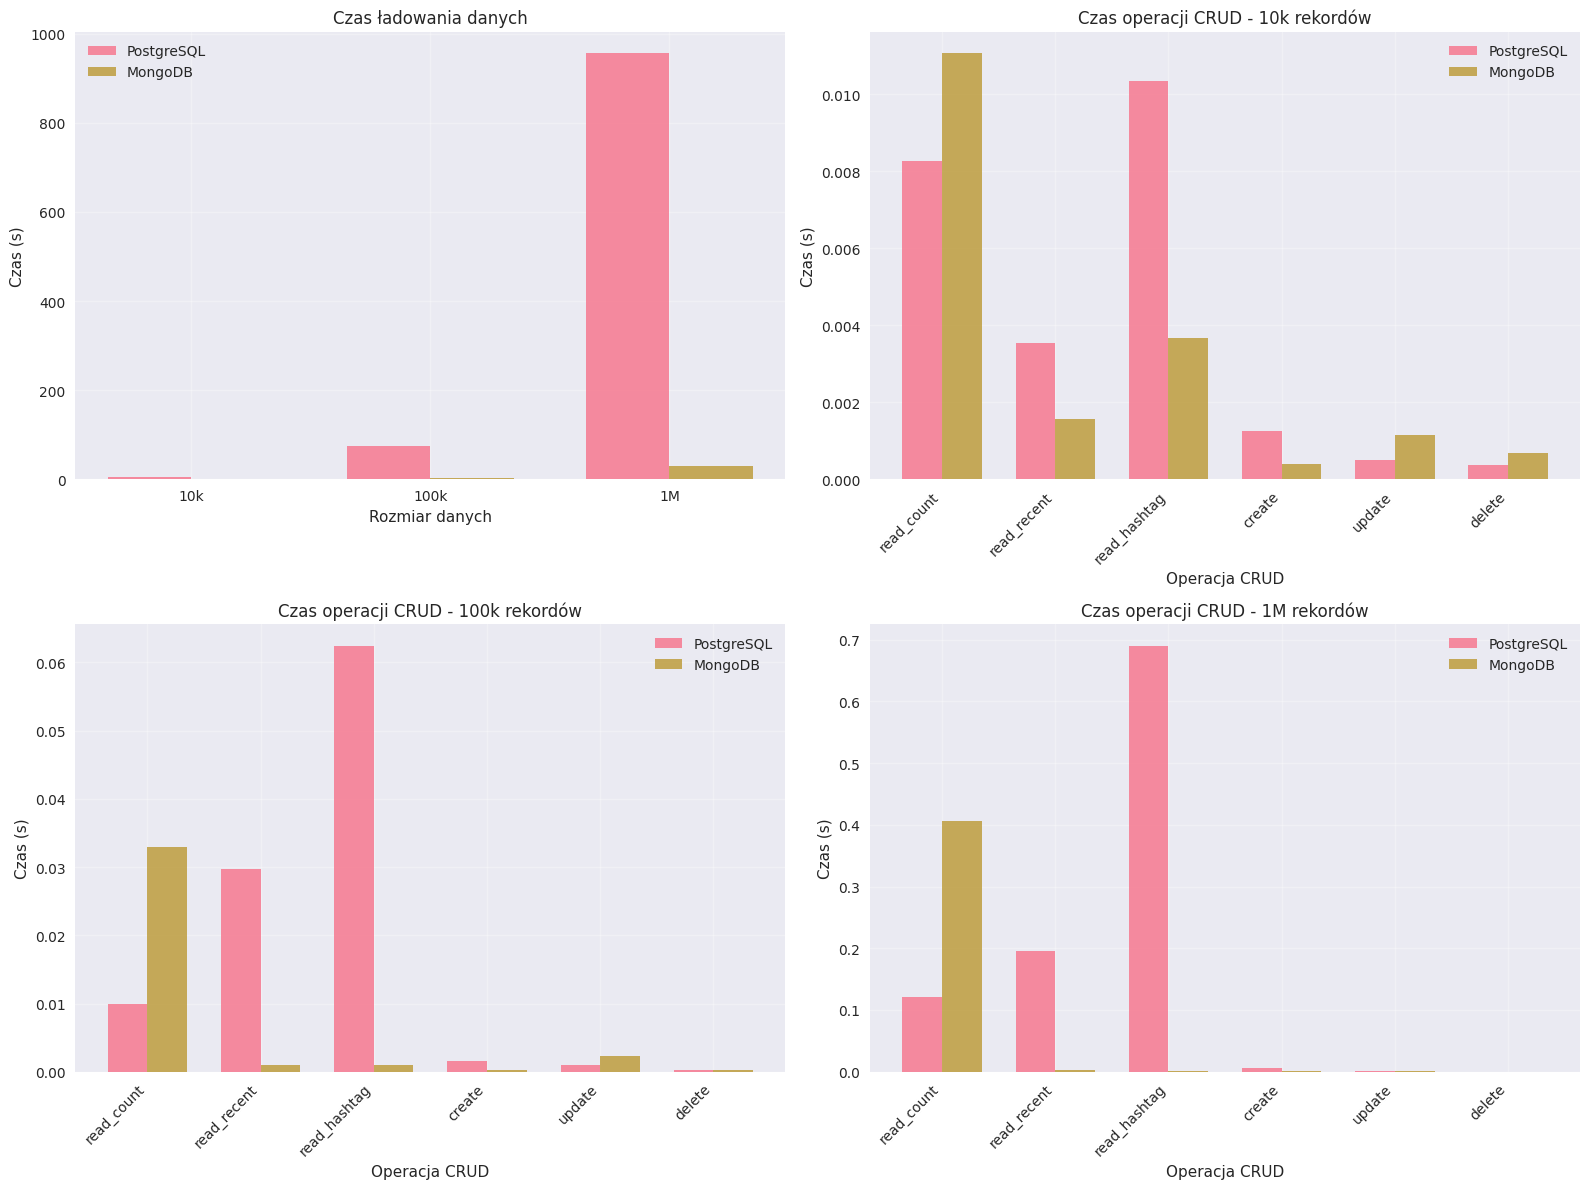

✅ Wizualizacja zakończona!


In [22]:
# Wizualizacja wyników - porównanie czasów ładowania
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Czas ładowania danych
sizes = ['10k', '100k', '1M']
pg_load_times = [results_10k['load']['postgresql'], results_100k['load']['postgresql'], results_1m['load']['postgresql']]
mongo_load_times = [results_10k['load']['mongodb'], results_100k['load']['mongodb'], results_1m['load']['mongodb']]

x = np.arange(len(sizes))
width = 0.35

ax1 = axes[0, 0]
ax1.bar(x - width/2, pg_load_times, width, label='PostgreSQL', alpha=0.8)
ax1.bar(x + width/2, mongo_load_times, width, label='MongoDB', alpha=0.8)
ax1.set_xlabel('Rozmiar danych')
ax1.set_ylabel('Czas (s)')
ax1.set_title('Czas ładowania danych')
ax1.set_xticks(x)
ax1.set_xticklabels(sizes)
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Czas operacji READ (read_count)
test_names = ['read_count', 'read_recent', 'read_hashtag', 'create', 'update', 'delete']
pg_times_10k = [results_10k['crud'][t]['postgresql'] for t in test_names]
mongo_times_10k = [results_10k['crud'][t]['mongodb'] for t in test_names]

ax2 = axes[0, 1]
x2 = np.arange(len(test_names))
ax2.bar(x2 - width/2, pg_times_10k, width, label='PostgreSQL', alpha=0.8)
ax2.bar(x2 + width/2, mongo_times_10k, width, label='MongoDB', alpha=0.8)
ax2.set_xlabel('Operacja CRUD')
ax2.set_ylabel('Czas (s)')
ax2.set_title('Czas operacji CRUD - 10k rekordów')
ax2.set_xticks(x2)
ax2.set_xticklabels(test_names, rotation=45, ha='right')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Porównanie dla 100k
pg_times_100k = [results_100k['crud'][t]['postgresql'] for t in test_names]
mongo_times_100k = [results_100k['crud'][t]['mongodb'] for t in test_names]

ax3 = axes[1, 0]
x3 = np.arange(len(test_names))
ax3.bar(x3 - width/2, pg_times_100k, width, label='PostgreSQL', alpha=0.8)
ax3.bar(x3 + width/2, mongo_times_100k, width, label='MongoDB', alpha=0.8)
ax3.set_xlabel('Operacja CRUD')
ax3.set_ylabel('Czas (s)')
ax3.set_title('Czas operacji CRUD - 100k rekordów')
ax3.set_xticks(x3)
ax3.set_xticklabels(test_names, rotation=45, ha='right')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Porównanie dla 1M
pg_times_1m = [results_1m['crud'][t]['postgresql'] for t in test_names]
mongo_times_1m = [results_1m['crud'][t]['mongodb'] for t in test_names]

ax4 = axes[1, 1]
x4 = np.arange(len(test_names))
ax4.bar(x4 - width/2, pg_times_1m, width, label='PostgreSQL', alpha=0.8)
ax4.bar(x4 + width/2, mongo_times_1m, width, label='MongoDB', alpha=0.8)
ax4.set_xlabel('Operacja CRUD')
ax4.set_ylabel('Czas (s)')
ax4.set_title('Czas operacji CRUD - 1M rekordów')
ax4.set_xticks(x4)
ax4.set_xticklabels(test_names, rotation=45, ha='right')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Wizualizacja zakończona!")


## 9. 📝 Podsumowanie i wnioski

### Analiza wyników:
- **PostgreSQL** - lepsze dla złożonych zapytań z JOIN-ami
- **MongoDB** - szybsze dla prostych operacji na dokumentach
- **Skalowanie** - różne wzorce wydajności w zależności od typu zapytań

### Rekomendacje:
- Wybierz **PostgreSQL** dla aplikacji wymagających złożonych relacji i transakcji
- Wybierz **MongoDB** dla aplikacji z prostymi operacjami na dokumentach i szybkim skalowaniem


In [ ]:
# Zamknij połączenia z bazami danych
print("🔌 Zamykanie połączeń...")
pg.close()
mg.close()
print("✅ Połączenia zamknięte!")
print("\n🎉 Eksperyment zakończony!")
